# Investigation of Borrower Reliability

## Let's open the dataset and analyze general information about the data

**We import the pandas library and read the data from the csv file into a dataframe, saving it into the `data` variable.**

In [69]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
csv_path = '/content/drive/My Drive/projects/bank_credit_score_analysis/data.csv'
# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(csv_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Display the first 20 lines of the `data` dataframe on the screen.**

In [70]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Display basic information about the dataframe using the `info()` method.**

<a id='item_1_1'></a> [Go to step 3](#item_2_7_1_1)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Data preprocessing

### Removing missing values in data

**Display the number of missing values for each column. We use a combination of two methods.**

In [72]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Before preprocessing the dataframe, we will check whether the gaps in the `days_employed` and `total_income` columns are in the same rows , because the number of gaps is the same and equal to 2174. And also how these gaps are distributed among the values in the columns `dob_years`, `education_id`, `family_status_id`, `gender`, `income_type`, `debt`**

**Let's first display the number of rows that have both missing values in the `days_employed` column and in the `total_income` column, using logical indexing and the `count()` method.**

In [73]:
data.loc[(data['days_employed'].isna()) & (data['total_income'].isna())]['debt'].count()

2174

We see that the value matches the number of gaps in each of the `days_employed` and `total_income` columns. We can conclude that the gaps in both columns correspond to the same row in the `data` dataframe.

**Let's check one by one how these gaps in the `data` dataframe are distributed among the values in the `dob_years`, `education_id`, `family_status_id`, `gender`, `income_type`, `debt` columns, using logical indexing and the `value_counts( )` with the `normalize=True` parameter to obtain the result as a fraction of the total number of passes.**

**Let's start with the distribution by the `dob_years` column, but additionally use the `cut()` function, where we put the sorted `dob_years` column in the first place of the argument, and put 5 in the second place of the argument to split all age values into 5 equal ranges. Let’s also add the condition of being at least 19 years old, because after all the preprocessing below, we already know that our “useful” data starts from 19 years of age and above.**

In [74]:
pd.cut(data.loc[(data['total_income'].isna()) & (data['dob_years'] >= 19)]['dob_years'], 5).value_counts(normalize=True).sort_values()

(62.2, 73.0]      0.067930
(18.946, 29.8]    0.138170
(51.4, 62.2]      0.237985
(40.6, 51.4]      0.264325
(29.8, 40.6]      0.291590
Name: dob_years, dtype: float64

We do not see any obvious dependence of gaps in the dataframe on age ranges here. But the lowest percentage of absences corresponds to ages from 18 to 30 and from 62 to 73 years.

**Next, let’s look at the distribution of gaps in the `education_id` column and display in the line below, before removing implicit duplicates, the correspondence between the values of the `education_id` and `education` columns for the first two rows**

In [75]:
print(data[data['total_income'].isna()]['education_id'].value_counts(normalize=True))
data[data['education_id'] <= 1][['education', 'education_id']].head(2)

1    0.708372
0    0.250230
2    0.031739
3    0.009660
Name: education_id, dtype: float64


,education,education_id
0,высшее,0
1,среднее,1


We see that the largest number of gaps corresponds to the value `'average'` ~71% and the value ``highest'` ~25%.

**Next, let’s look at the distribution of gaps in the `family_status_id` column and display in the line below, before removing implicit duplicates, the correspondence between the values of the `family_status_id` column and `family_status`.**

In [76]:
print(data[data['total_income'].isna()]['family_status_id'].value_counts(normalize=True))
data.groupby('family_status')['family_status_id'].unique()

0    0.568997
1    0.203312
4    0.132475
3    0.051518
2    0.043698
Name: family_status_id, dtype: float64


family_status
Не женат / не замужем    [4]
в разводе                [3]
вдовец / вдова           [2]
гражданский брак         [1]
женат / замужем          [0]
Name: family_status_id, dtype: object

We see that the most gaps correspond to the value “married” ~57% and the value “civil marriage” ~20%.

**Next, let's look at the distribution of gaps in the `gender` column.**

In [77]:
data[data['total_income'].isna()]['gender'].value_counts(normalize=True)

F    0.682613
M    0.317387
Name: gender, dtype: float64

We see that most of the gaps correspond to the value `'F'` ~68%.

**Next, let's look at the distribution of gaps by the `income_type` column.**

In [78]:
data[data['total_income'].isna()]['income_type'].value_counts(normalize=True)

сотрудник          0.508280
компаньон          0.233671
пенсионер          0.189972
госслужащий        0.067617
предприниматель    0.000460
Name: income_type, dtype: float64

We see that the most gaps correspond to the value `'employee'` ~51% and the value ``companion'` ~23%.

**Next, let's look at the distribution of gaps in the `debt` column.**

In [79]:
data[data['total_income'].isna()]['debt'].value_counts(normalize=True)

0    0.921803
1    0.078197
Name: debt, dtype: float64

We see that most of the gaps correspond to the value `'0'` ~92%, which corresponds to the absence of loan debt.

**Two columns have missing values. One of them is `days_employed`. The gaps in this column will be processed in the next step. Another column with missing values, `total_income`, stores income data. The amount of income is most influenced by the type of employment, so fill the gaps in this column with the median value for each type from the `income_type` column. For example, for a person with an employment type of `employee`, the gap in the `total_income` column must be filled with the median income among all records with the same type.**

In [80]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Handling anomalous values

**The data may contain artifacts (anomalies) - values that do not reflect reality and appeared due to some error. such an artifact would be a negative number of days of employment in the `days_employed` column. This is normal for real data. Let's process the values in this column: replace all negative values with positive ones using the `abs()` method.**

In [81]:
data['days_employed'] = data['days_employed'].abs()

**For each type of employment, we will display the median value of length of service `days_employed` in days.**

In [82]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

Two types (unemployed and pensioners) will have abnormally large values. It is difficult to correct such values, so we will leave them as they are. Moreover, this column will not be needed for research.

**We will display a list of unique values for the `children` column.**

In [83]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Let's estimate how many rows of data will be lost if rows with anomalous values in the `children` column are deleted.**

In [84]:
data[(data['children'] == -1) | (data['children'] == 20)]['children'].count()

123

We get a value of less than 1% of all data, which can be considered not a critical reduction in data for analysis.

**There are two anomalous values in the `children` column. Let's remove lines containing such anomalous values from the `data` dataframe.**

In [85]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Let's list the unique values of the `children` column again to make sure the artifacts have been removed.**

In [86]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Removing gaps (continued)

**Fill in the blanks in the `days_employed` column with the median values for each `income_type` employment type.**

In [87]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Make sure all blanks are filled in. Let's check ourselves and once again display the number of missing values for each column using two methods.**

In [88]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Changing data types

**Replace the real data type in the `total_income` column with an integer using the `astype()` method.**

In [89]:
data['total_income'] = data['total_income'].astype('int')

<ipython-input-89-230bf46a8b16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_income'] = data['total_income'].astype('int')


### Handling duplicates

**Let's handle implicit duplicates in the `education` column. This column has the same values, but written differently, using uppercase and lowercase letters. Let's convert them to lower case.**

In [90]:
data['education'] = data['education'].str.lower()

<ipython-input-90-d4b849f854d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['education'] = data['education'].str.lower()


**We will display the number of duplicate rows in the data. If such lines are present, delete them.**

<a id='item_2_5'></a> [Go to step 3](#item_2_7_1_2)

In [91]:
data.duplicated().sum()

71

In [92]:
data = data.drop_duplicates()

### Data categorization

**Based on the ranges indicated below, we will create a `total_income_category` column with categories in the `data` dataframe:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 and above - `'A'`.


**For example, we will assign category `'E'' to a borrower with an income of 25,000, and category `'B'' to a client receiving 235,000. We use our own function called `categorize_income()` and the `apply()` method.**

[to step 2.7.1.1](#item_2_7_1_1_2) <a id='item_2_6_1'></a>

In [93]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [94]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

<ipython-input-94-0bc713f3049f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_income_category'] = data['total_income'].apply(categorize_income)


**We will display a list of unique purposes for taking out a loan from the `purpose` column.**

In [95]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Let's create a function that, based on the data from the `purpose` column, will form a new `purpose_category` column, which will include the following categories:**

- ``operations with a car'`,
- ``real estate transactions'`,
- ``carrying out a wedding'`,
- ``getting an education'`.

**For example, if the `purpose` column contains the substring ``for the purchase of a car'`, then the `purpose_category` column will contain the string ``operations with a car'`.**

**We use our own function called `categorize_purpose()` and the `apply()` method. Let's examine the data in the `purpose` column and determine which substrings will help correctly determine the category.**

In [96]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [97]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

<ipython-input-97-ecf9d79505dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['purpose_category'] = data['purpose'].apply(categorize_purpose)


### 3. Explore the data

#### 3.1 Let's check whether there is a relationship between the number of children and repayment of the loan on time.

##### Before proceeding to the study of the dependency from clause 2.7.1, it is necessary to additionally check that the preprocessing of the data frame data `data` has been completed completely and you can continue working with it.

**<a id='item_2_7_1_2'></a> Previously, we deleted rows with obvious duplicates ([here](#item_2_5)) and did not reset the indexing in the `data` dataframe. Let's do this now using the `reset_index()` method with the `drop=True` parameter, thereby not saving the old indexing.**

In [98]:
data = data.reset_index(drop=True)

**After performing all the operations with the data above, let's check the current information about the `data` dataframe using the `info()` method.**

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21331 entries, 0 to 21330
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               21331 non-null  int64  
 1   days_employed          21331 non-null  float64
 2   dob_years              21331 non-null  int64  
 3   education              21331 non-null  object 
 4   education_id           21331 non-null  int64  
 5   family_status          21331 non-null  object 
 6   family_status_id       21331 non-null  int64  
 7   gender                 21331 non-null  object 
 8   income_type            21331 non-null  object 
 9   debt                   21331 non-null  int64  
 10  total_income           21331 non-null  int64  
 11  purpose                21331 non-null  object 
 12  total_income_category  21331 non-null  object 
 13  purpose_category       21331 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 2.3+ 

We see that after removing rows with anomalous data in the `children` column and removing obvious duplicates, the number of rows in the `data` dataframe decreased from 21525 to 21331 compared to the original dataframe ([information about the original DF](#item_1_1)), which is less than 1% of all lines.
We consider such a reduction in the amount of data to have a non-critical impact on further research and can continue it. <a id='item_2_7_1_1'></a>

We also see that all columns now have no gaps (`NaN`\`None` objects) and all columns have the same number of rows.

**Let's now evaluate the updated data. Let's print the first 20 lines of the updated dataframe `data`**

In [100]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


The first thing that catches your eye is the float type of the `days_employed` column, although for our research, integer values for this parameter will be enough, so let’s convert the values of this column to the `int` type.

The data types of quantitative and categorical variables are appropriate for the purpose.

**Convert the data in the `days_employed` column to an integer type using the `astype()` method**

In [101]:
data['days_employed'] = data['days_employed'].astype('int')

**After all the transformations, we will check the data in those columns of the `data` dataframe that were not previously checked for implicit duplicates and errors, using the `unique()` method. Let's apply it one by one to the columns `dob_years`, `education`, `education_id`, `family_status`, `family_status_id`, `gender`, `income_type`, `debt`.**

**Apply the `unique()` method to the `dob_years` column of the `data` dataframe. Let's immediately sort the data in ascending order using the `sort_values()`** method

In [102]:
data['dob_years'].sort_values().unique()

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

We see that there are some rows with the value 0, which is an incorrect age value.

**Let's clarify how many rows have an age in the `dob_years` column equal to 0. We find out this using logical indexing of the `data` dataframe and the `count()` method.**

In [103]:
data[data['dob_years'] == 0]['dob_years'].count()

100

The number of rows with an age of 0 is 100, which is less than 0.5% of the total number of rows 21331.

**Delete rows in which the age (the values of the `dob_years` column) is equal to the anomalous value 0 and reset the indexing in the `data` dataframe using the `reset_index()` method with the `drop=True` parameter, thereby not saving the old indexing. **

In [104]:
data = data[data['dob_years'] != 0].reset_index(drop=True)

**Now let's check the unique age values in the `dob_years` column of the `data` dataframe.**

In [105]:
data['dob_years'].sort_values().unique()

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75])

We see that rows with zero age were successfully deleted.

**Apply the `unique()` method to the `education` column of the `data` dataframe.**

In [106]:
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Everything is fine with the uniqueness of the values; there are no implicit duplicates in this column.

**Apply the `unique()` method to the `education_id` column of the `data` dataframe.**

In [107]:
data['education_id'].unique()

array([0, 1, 2, 3, 4])

We can conclude that the number of unique identifiers in the `education_id` column is equal to the number of unique values in the `education` column.

**Now let’s check whether the `education` and `education_id` columns are correctly correlated in all rows of the `data` dataframe. To do this, we use the method to calculate the average value `mean()` for the `education_id` column for the `data` dataframe grouped by the values of the `education` column.
If the values of these columns are correlated without errors in all rows, we will obtain an integer value as a result of applying the method in each case.**

In [108]:
data.groupby('education')['education_id'].mean()

education
высшее                 0.0
начальное              3.0
неоконченное высшее    2.0
среднее                1.0
ученая степень         4.0
Name: education_id, dtype: float64

We conclude that the values of the `education` and `education_id` columns are correlated correctly.

**Apply the `unique()` method to the `family_status` column of the `data` dataframe.**

In [109]:
data['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

Everything is fine with the uniqueness of the values; there are no implicit duplicates in this column. But one of the values has a capital letter.

**We will reduce all values to the standard of lowercase letters. To do this, apply the `str.lower()` method to all values in the `family_status` column.**

In [110]:
data['family_status'] = data['family_status'].str.lower()

**Apply the `unique()` method to the `family_status_id` column of the `data` dataframe.**

In [111]:
data['family_status_id'].unique()

array([0, 1, 2, 3, 4])

We can conclude that the number of unique identifiers in the `family_status_id` column is equal to the number of unique values in the `family_status` column.

**Now let's check whether the `family_status` and `family_status_id` columns are correctly correlated in all rows of the `data` dataframe. To do this, we use the method to calculate the average value `mean()` for the `family_status_id` column for the `data` dataframe, grouped by the values of the `family_status` column.
If the values of these columns are correlated without errors in all rows, we will obtain an integer value as a result of applying the method in each case.**

In [112]:
data.groupby('family_status')['family_status_id'].mean()

family_status
в разводе                3.0
вдовец / вдова           2.0
гражданский брак         1.0
женат / замужем          0.0
не женат / не замужем    4.0
Name: family_status_id, dtype: float64

We conclude that the values of the `family_status` and `family_status_id` columns are correlated correctly.

**Apply the `unique()` method to the `gender` column of the `data` dataframe.**

In [113]:
data['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

Everything is fine with the uniqueness of the values; there are no implicit duplicates in this column. But
In addition to the standard two types of floors, we see a strange value `'XNA'`

**Let's count how many rows of the dataframe `data` have the value `'XNA'` in the `gener` column. To do this, we use logical indexing and the `count()` method.**

In [114]:
data[data['gender'] == 'XNA']['gender'].count()

1

There was only one such value in the `data` dataframe. We consider it anomalous and not affecting the analysis, so we will delete it.

**Delete the row of the `data` dataframe with the anomalous value `'XNA'` in the `gender` column and reset the indexing in the `data` dataframe using the `reset_index()` method with the `drop=True` parameter, thereby not saving the old one indexing.**

In [115]:
data = data[data['gender'] != 'XNA'].reset_index(drop=True)

**Apply the `unique()` method to the `income_type` column of the `data` dataframe.**

In [116]:
data['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

Everything is fine with the uniqueness of the values; there are no implicit duplicates in this column.

**Apply the `unique()` method to the `debt` column of the `data` dataframe.**

In [117]:
data['debt'].unique()

array([0, 1])

Everything is fine with the uniqueness of the values; there are no implicit duplicates in this column.

**We will categorize the data. Let's create "directories" for the columns `education`, `family_status`, `total_income_category`, `purpose_category`, `income_type`. After this, we will resave the filtered dataframe into a new variable.**

**We will create a “directory” of education levels and assign each level to its id. Let's do this by grouping the original dataframe `data` by the `education_id` column for the `education` column and the `unique()` method. Let's save the new "reference" dataframe under the name `education_dict`**

In [118]:
education_dict = data[['education','education_id']].drop_duplicates().reset_index(drop=True)
education_dict

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


**Let's do similar actions for the `family_status_id` and `family_status` columns. Let's save the new "reference" dataframe under the name `family_status_dict`**

In [119]:
family_status_dict = data[['family_status_id','family_status']].drop_duplicates().reset_index(drop=True)
family_status_dict

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


**Let's create a new “reference” dataframe under the name `total_income_dict` for the ratio of categories of total income and the range of income for each of these categories in accordance with how it was written in the function for assigning these categories in [clause 2.6.1](#item_2_6_1 ).**

In [120]:
total_income_dict = pd.DataFrame(
                                 {'total_income_category': ['A', 'B', 'C', 'D', 'E'],
                                  'min': [1000001, 200001, 50001, 30001, 0],
                                  'max': [float('inf'), 1000000, 200000, 50000, 30000]}
                                 )
total_income_dict

,total_income_category,min,max
0,A,1000001,inf
1,B,200001,1000000.0
2,C,50001,200000.0
3,D,30001,50000.0
4,E,0,30000.0


**Let's create a function named `purpose_id()`, which will help, based on the data from the `purpose_category` column, to form a new column `purpose_category_id`, which will include identifiers with the following correspondence:**

- `0` - `'operations with the car'`,
- `1` - ``real estate transactions'`,
- `2` - ``wedding'`,
- `3` - ``getting an education'`.


**Using this function and the `apply()` method we will create a new column in the dataframe.**

In [121]:
def purpose_id(purpose_category):
    try:
        if purpose_category == 'операции с автомобилем':
            return 0
        elif purpose_category == 'операции с недвижимостью':
            return 1
        elif purpose_category == 'проведение свадьбы':
            return 2
        elif purpose_category == 'получение образования':
            return 3
        else:
            return -1
    except:
        return -2
data['purpose_category_id'] = data['purpose_category'].apply(purpose_id)

**Let's create a new “reference” dataframe called `purpose_dict` for the relationship between the identifier and the corresponding loan purpose category. Let's do this by grouping the original dataframe `data` by the `purpose_category_id` column for the `purpose_category` column and the `unique()` method.**

In [122]:
purpose_dict = data[['purpose_category_id','purpose_category']].drop_duplicates().reset_index(drop=True)
purpose_dict

,purpose_category_id,purpose_category
0,1,операции с недвижимостью
1,0,операции с автомобилем
2,3,получение образования
3,2,проведение свадьбы


**Let's create a function called `income_type_id()`, which will help, based on the data from the `income_type` column, to form a new column `income_type_id`, which will include identifiers with the following correspondence:**

- `0` - `'employee'`,
- `1` - ``pensioner'`,
- `2` - ``companion'`,
- `3` - ``civil servant'`,
- `4` - ``unemployed'`,
- `5` - ``entrepreneur'`,
- `6` - `'student'`,
- `7` - ``on maternity leave'`.


**Using this function and the `apply()` method we will create a new column in the dataframe.**

In [123]:
def income_type_id(income_type):
    try:
        if income_type == 'сотрудник':
            return 0
        elif income_type == 'пенсионер':
            return 1
        elif income_type == 'компаньон':
            return 2
        elif income_type == 'госслужащий':
            return 3
        elif income_type == 'безработный':
            return 4
        elif income_type == 'предприниматель':
            return 5
        elif income_type == 'студент':
            return 6
        elif income_type == 'в декрете':
            return 7
        else:
            return -1
    except:
        return -2
data['income_type_id'] = data['income_type'].apply(income_type_id)

**Let's create a new “reference” dataframe called `income_type_dict` for the relationship between the identifier and the client’s corresponding employment goal. Let's do this by grouping the original dataframe `data` by the `income_type_id` column for the `income_type` column and the `unique()` method.**

In [124]:
income_type_dict = data[['income_type_id','income_type']].drop_duplicates().reset_index(drop=True)
income_type_dict

,income_type_id,income_type
0,0,сотрудник
1,1,пенсионер
2,2,компаньон
3,3,госслужащий
4,4,безработный
5,5,предприниматель
6,6,студент
7,7,в декрете


**Let's create a new dataframe filtered by the list of columns, leaving only columns with id and categories, for the convenience of further analysis and viewing of data. Let's print it in the top 10 lines.**

In [125]:
df = data[['children', 'days_employed', 'dob_years', 'education_id', 'family_status_id', 'gender', 'income_type_id', 'debt', 'total_income_category', 'purpose_category_id']].copy()
df.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type_id,debt,total_income_category,purpose_category_id
0,1,8437,42,0,0,F,0,0,B,1
1,1,4024,36,1,0,F,0,0,C,0
2,0,5623,33,1,0,M,0,0,C,1
3,3,4124,32,1,0,M,0,0,B,3
4,0,340266,53,1,1,F,1,0,C,2
5,0,926,27,0,1,M,2,0,B,1
6,0,2879,43,0,0,F,2,0,B,1
7,0,152,50,1,0,M,0,0,C,3
8,2,6929,35,0,1,F,0,0,C,2
9,0,2188,41,1,0,M,0,0,C,1


**Preprocessing of the data in the original dataframe is completed, you can begin further analysis of hypothetical dependencies. We are now working with the prepared dataframe `df`.**

##### Let's return to the study of the issue in this subparagraph: is there a relationship between the number of children and repayment of the loan on time?

**Let's find out what percentage of the total number of clients had debt on repaying loans. To do this, apply the `mean()` method to the `debt` column.**

In [126]:
df['debt'].mean()

0.08120584079133301

Only 8.1% of all clients had loan repayment arrears. The percentage is not very large, but not negligibly small, so we will further analyze the data.

**Let's group the data frame in such a way as to see how the share of those who had debt on loan repayment is distributed depending on the number of children and the number of clients in each of these groups. To do this, let's group by the `children` column for the `debt` column and use the `agg()` function in which the arguments will be two methods `count` and `mean`.**

In [127]:
df.groupby('children')['debt'].agg(['count', 'mean'])

,count,mean
children,,
0,14021,0.075458
1,4792,0.092028
2,2039,0.095145
3,328,0.082317
4,41,0.097561
5,9,0.000000


In [128]:
def pivot_generator(dataframe, column):
    t = pd.pivot_table(dataframe,
               index=column,
               values='debt',
               aggfunc=['count', 'sum','mean'])
    t.columns = ['_'.join(col).strip() for col in t.columns.values]
    t = t.reset_index().sort_values(by='mean_debt')
    t.columns = [column, 'customer_count', 'debt_sum', 'debt_share']
    return t

pivot_generator(df,'total_income_category')

,total_income_category,customer_count,debt_sum,debt_share
3,D,347,21,0.060519
1,B,4987,353,0.070784
0,A,25,2,0.080000
2,C,15849,1346,0.084926
4,E,22,2,0.090909


**Let us now construct a bar chart reflecting the dependence of the share of those who had debt on loan repayment on the number of children.**

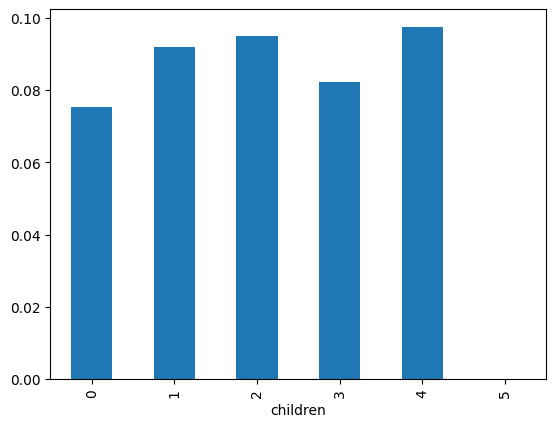

In [129]:
df.groupby('children')['debt'].mean().plot(kind='bar');

We see that groups with 4 and 5 children are very few in number compared to the total number, so information on the dependence of the presence of loan debt for these groups will be unrepresentative. For correct analysis, you can combine these groups with a group with 3 children. In this case, we leave the new group with the integer value 3, because If you assign the string value `3 or more` for a given group, for example, then you will have to change the type to `str` for all other numeric values in the `children` column, and this is not very true for quantitative variables.

**Let's write a function that will change the value in the `children` column to 3 if the current value in the cell is more than 3.**

In [130]:
def children_number(number):
    try:
        if 3 < number:
            return 3
        else:
            return number
    except:
        pass

**Now apply this function to the `children` column with adjusted values and see how the percentage of those in debt is distributed depending on the number of children and the number of clients in each of these groups. To do this, let's group by the `children` column for the `debt` column and use the `agg()` function in which the arguments will be two methods `count` and `mean`.**

**We will also use the `value_counts` method with the `normalize=True` parameter to estimate the proportion of each group by the number of children in the entire dataframe**

In [131]:
df['children'] = df['children'].apply(children_number)
print(df.groupby('children')['debt'].agg(['count', 'mean']))
df['children'].value_counts(normalize=True)

          count      mean
children                 
0         14021  0.075458
1          4792  0.092028
2          2039  0.095145
3           378  0.082011


0    0.660433
1    0.225718
2    0.096043
3    0.017805
Name: children, dtype: float64

**Let us now construct a bar chart using the updated values, reflecting the dependence of the share of those who had debt on loan repayment on the number of children.**

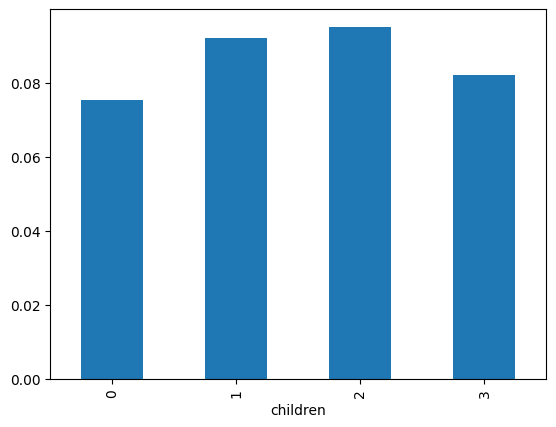

In [132]:
df.groupby('children')['debt'].mean().plot(kind='bar');

**We see from the diagram that the share of clients who had a loan repayment debt grows depending on the number of children the client has, however, for the value `3` (3 or more children), the share of those who had a loan repayment debt falls to a level corresponding to the values absence of children and presence of one child. At the same time, the minimum share of those who had debt is in the largest group with a value of 0 children.**

**Let’s check how clients with different numbers of children are distributed across monthly income categories. To do this, we will build a pivot table using the `pivot_table()` method, in which we will take information about the presence of debt as values, and display the share with debt using the `mean()` method and the number of records for the intersection of income categories and the number of children with using the `count()` method to evaluate whether this data can be used in our analysis.**

**Additionally, for orientation in the data, we will display a “dictionary” `total_income_dict` of income level categories.**

In [133]:
print(total_income_dict)
t = pd.pivot_table(df,
               index=['children', 'total_income_category'],
               values='debt',
               aggfunc=['count','mean'])
t.columns = ['_'.join(col).strip() for col in t.columns.values]
t.sort_values(by='mean_debt')

  total_income_category      min        max
0                     A  1000001        inf
1                     B   200001  1000000.0
2                     C    50001   200000.0
3                     D    30001    50000.0
4                     E        0    30000.0


count_debt  mean_debt
children total_income_category                       
1        E                               4   0.000000
3        A                               1   0.000000
2        E                               1   0.000000
         A                               3   0.000000
0        D                             241   0.049793
3        B                              99   0.050505
1        D                              66   0.060606
0        B                            3227   0.067865
1        B                            1164   0.075601
0        C                           10524   0.078297
2        B                             497   0.082495
0        A                              12   0.083333
3        C                             272   0.091912
1        C                            3549   0.098056
2        C                            1504   0.099069
1        A                               9   0.111111
2        D                              34   0.117647
0        E                              17   0.117647
3        D                               6   0.166667

**The number of records for categories `'A'` and `'E'` is very small among other values, which will only interfere with the analysis. Let's discard these values from our sample, build a pivot table after filtering with the same two functions `mean()` and `count()` and sort it in ascending order.**

In [134]:
t = pd.pivot_table(df[(df['total_income_category'] != 'A')&(df['total_income_category'] != 'E')],
               index=['children', 'total_income_category'],
               values='debt',
               aggfunc=['count','mean'])
t.columns = ['_'.join(col).strip() for col in t.columns.values]
t.sort_values(by='mean_debt')

,,count_debt,mean_debt
children,total_income_category,,
0,D,241,0.049793
3,B,99,0.050505
1,D,66,0.060606
0,B,3227,0.067865
1,B,1164,0.075601
0,C,10524,0.078297
2,B,497,0.082495
3,C,272,0.091912
1,C,3549,0.098056


**It was not possible to identify any clear connection between the amount of income in the group with 3 children, which would explain the decrease in the share of debtors in the presence of 3 children.**

**Let's continue researching other connections.**

**Let’s check how clients with different numbers of children are distributed according to loan purposes. To do this, we will build a pivot table using the `pivot_table()` method, in which we will take information about the presence of debt as values, and display the share of debt using the `mean()` method and the number of records for the intersection of loan goals and the number of children with using the `count()` method to evaluate whether this data can be used in our analysis.**

**Additionally, for orientation in the data, we will display a “dictionary” `purpose_dict` of loan goals.**

In [135]:
print(purpose_dict)
t = pd.pivot_table(df,
               index=['children', 'purpose_category_id'],
               values='debt',
               aggfunc=['count','mean'])
t.columns = ['_'.join(col).strip() for col in t.columns.values]
t.sort_values(by='mean_debt')

   purpose_category_id          purpose_category
0                    1  операции с недвижимостью
1                    0    операции с автомобилем
2                    3     получение образования
3                    2        проведение свадьбы


count_debt  mean_debt
children purpose_category_id                       
3        3                            77   0.051948
2        2                           215   0.055814
0        1                          7043   0.067301
         2                          1519   0.074391
1        1                          2442   0.081491
3        1                           193   0.082902
         0                            72   0.083333
0        0                          2832   0.085452
2        1                          1025   0.085854
0        3                          2627   0.087172
1        2                           529   0.096408
         3                           865   0.104046
         0                           956   0.105649
2        3                           401   0.114713
         0                           398   0.120603
3        2                            36   0.138889

**We see that a large share of the group with 3 children took out a loan for the purpose of “real estate transactions.” Let's check the distribution of the shares of debtors by loan purpose in the entire dataframe and display it in the form of a bar chart in increasing order of the share of debtors.**

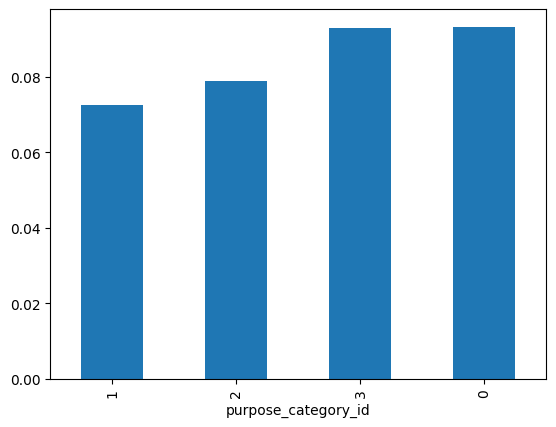

In [136]:
df.groupby('purpose_category_id')['debt'].mean().sort_values().plot(kind='bar');

**We see that the smallest share of debtors was in the group where the purpose of the loan was “real estate transactions.” This is where a possible explanation appears for why in the group with 3 children we received a smaller share of debtors than in the group with 2 children. Most of the clients with 3 children took out a loan to improve their living conditions, which is usually secured by the collateral of the same real estate. However, one must also take into account the fact that the group of 3 or more children is extremely small in terms of the number of clients compared to the total number of clients in the dataframe and is only 1.8%, which may mean that it is unrepresentative**

**Conclusion: we see that the share of clients who had a loan repayment debt grows depending on the number of children the client has, however, for the value of `3` or more children, the share of those who had a loan repayment debt falls, but the number of this group of clients is only 1.8% of all clients in the dataset, which may give incorrect results due to the unrepresentativeness of this group.**

#### 3.2 Let's check whether there is a relationship between marital status and repayment of the loan on time.

**Let’s group the data frame in such a way as to see how the share of those who had debt to repay the loan is distributed depending on their marital status and the number of clients in each of these groups. To do this, we will group by the `family_status_id` column for the `debt` column and apply the `agg()` function in which the arguments will be two methods `count` and `mean`.**

**We will also use the `value_counts` method with the `normalize=True` parameter to estimate the proportion of each group with different marital status in the entire dataframe**

In [137]:
print(df.groupby('family_status_id')['debt'].agg(['mean', 'count']))
df['family_status_id'].value_counts(normalize=True)

                      mean  count
family_status_id                 
0                 0.075575  12213
1                 0.093142   4112
2                 0.065539    946
3                 0.071247   1179
4                 0.097842   2780


0    0.575271
1    0.193688
4    0.130947
3    0.055535
2    0.044560
Name: family_status_id, dtype: float64

**Let us now construct a column chart in ascending order according to the values reflecting the share of those who had debts depending on their marital status. Additionally, we will display a “dictionary” of these values to make it easier to correlate the identifier and the corresponding value of the client’s marital status.**

   family_status_id          family_status
0                 0        женат / замужем
1                 1       гражданский брак
2                 2         вдовец / вдова
3                 3              в разводе
4                 4  не женат / не замужем


<Axes: xlabel='family_status_id'>

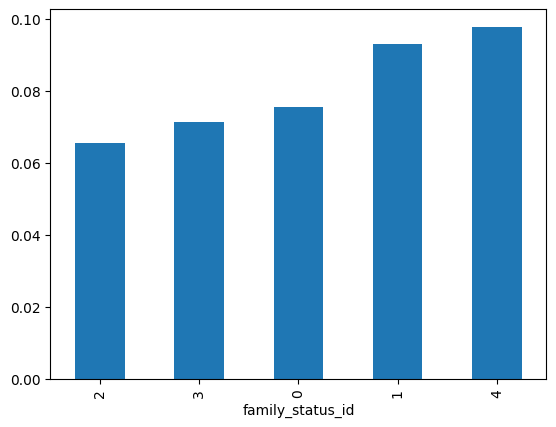

In [138]:
print(family_status_dict)
df.groupby('family_status_id')['debt'].mean().sort_values().plot(kind='bar')

**Conclusion: we see that the share of having a loan repayment debt is higher among those clients who are in a “civil marriage” or “single”, and for the value “not married” the share of those who had a loan repayment debt the highest of all. At the same time, for the values `widower/widow` and `divorced`, the share of those who had debt to repay the loan is the lowest, but these groups are not numerous - 4.4% and 5.5% of the total number of clients in the dataset, respectively.**

#### 3.3 Let's check whether there is a relationship between the level of income and repayment of the loan on time.

**Let's group the data frame in such a way as to see how the share of those who had debt on loan repayment is distributed depending on the level of income and the number of clients in each of these groups. To do this, let's group by the `total_income_category` column for the `debt` column and apply the `agg()` function in which the arguments will be two methods `count` and `mean`.**

**We will also use the `value_counts` method with the `normalize=True` parameter to estimate the proportion of the number of each category in the entire dataframe**

In [139]:
print(df.groupby('total_income_category')['debt'].agg(['mean', 'count']))
df['total_income_category'].value_counts(normalize=True)

                           mean  count
total_income_category                 
A                      0.080000     25
B                      0.070784   4987
C                      0.084926  15849
D                      0.060519    347
E                      0.090909     22


C    0.746538
B    0.234903
D    0.016345
A    0.001178
E    0.001036
Name: total_income_category, dtype: float64

**Let us now construct a bar chart reflecting the dependence of the share of those who had debt on loan repayment on the level of income. Additionally, we will display a “dictionary” of these values to make it easier to correlate the key and the corresponding value of the client’s income level range.**

  total_income_category      min        max
0                     A  1000001        inf
1                     B   200001  1000000.0
2                     C    50001   200000.0
3                     D    30001    50000.0
4                     E        0    30000.0


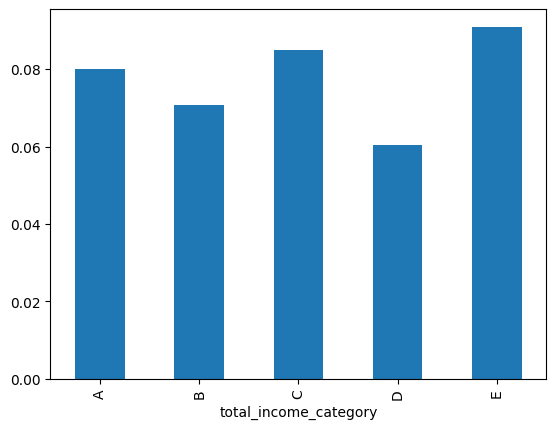

In [140]:
print(total_income_dict)
df.groupby('total_income_category')['debt'].mean().plot(kind='bar');

**We see that the amount of data in income categories `'A'`, `'D'`, `'E'` is too small in comparison with other categories to take into account the shares of debtors in these categories, the number of these categories from the total dataset 0.1%, 0.1% and 1.6% respectively. Let's discard them in the analysis.**

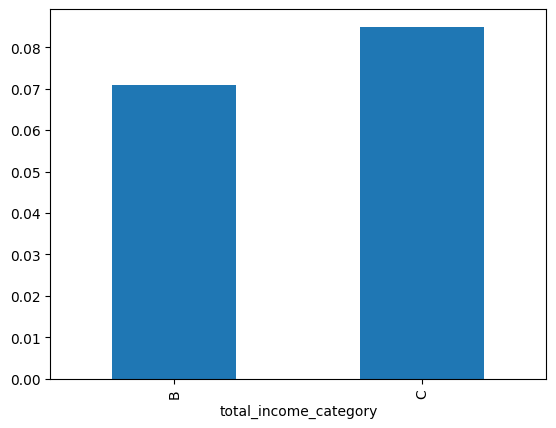

In [141]:
df[(df['total_income_category'] == 'B') | (df['total_income_category'] == 'C')].groupby('total_income_category')['debt'].mean().plot(kind='bar');

**Conclusion: We see that the lower the client’s income level, the higher the likelihood of loan debt.**

#### 3.4 Let's check how different purposes of a loan affect its repayment on time.

**Let’s group the data frame in such a way as to see how the share of those who had a loan repayment debt is distributed depending on the purpose of the loan and the number of clients in each of these groups. To do this, we will group by the `purpose_category_id` column for the `debt` column and apply the `agg()` function in which the arguments will be two methods `count` and `mean`.**

In [142]:
df.groupby('purpose_category_id')['debt'].agg(['mean', 'count'])

,mean,count
purpose_category_id,,
0,0.093236,4258
1,0.072596,10703
2,0.078730,2299
3,0.092947,3970


**Let us now construct a column chart in ascending order, reflecting the dependence of the share of those who had a debt to repay the loan on the purpose of the loan. Additionally, we will display a “dictionary” of these values to make it easier to correlate the identifier and the corresponding value of the client’s loan purpose.**

   purpose_category_id          purpose_category
0                    1  операции с недвижимостью
1                    0    операции с автомобилем
2                    3     получение образования
3                    2        проведение свадьбы


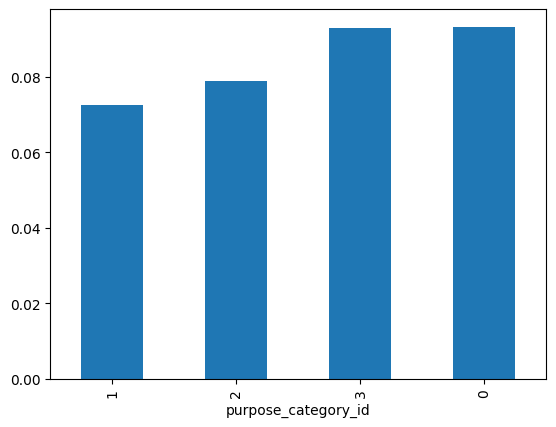

In [143]:
print(purpose_dict)
df.groupby('purpose_category_id')['debt'].mean().sort_values(ascending=True).plot(kind='bar', ylim=0);

**Conclusion: car loans have the largest share of debtors. At the same time, real estate transactions have the smallest share of debtors.**

#### 3.5 Possible reasons for the appearance of gaps in the source data.

The reasons may be related to either a problem in unloading data from the source database or problems when entering data into the source database. Based on the [research](#item_1_2) I conducted above in paragraph 1.1, the following features were discovered:*

- Gaps in both `total_income` and `days_employed` columns refer to the same rows,
- The lowest percentage of absences corresponds to ages from 18 to 30 and from 62 to 73 years,
- 71% of missing values correspond to the value `'average'' in the `education` column,
- 57% of gaps correspond to the value `'married'' in the `family_status` column,
- 68% of gaps correspond to the value `'F'` in the `gender` column,
- 51% of gaps correspond to the value `'employee'` in the `income_type` column,
- 92% of missing values correspond to the value `'0'` in the `debt` column.

**First hypothesis:** gaps in the values of income and total work experience are associated with the human factor.
For example, users filling out a form to apply for a loan did not provide this information. It can be assumed that this is typical for young men/women who do not yet have work experience and a regular income and are applying for a loan for the first time. However, the percentage of absences for ages 18 to 30 is minimal, although the highest percentage of absences is typical for people who have not previously had debt on loans.
The hypothesis is not supported due to the distribution of absences relative to the age of the people.
Also, if applicants omitted these fields in the application form, we would most likely see gaps in at least one of the lines in two columns in different lines, but in our case, gaps in two columns refer to the same lines, which may indicate some systemic nature of these omissions.

**Second hypothesis:** gaps in the data are due to a technical factor, and these data were not transferred from the database, for example, containing information about people who do not have debts (since the gap rate is 92% for people without debts). This hypothesis is also supported by the systematic nature of the omission in both columns - i.e. gaps in two different columns are specific only to the same rows (people). * <a id='item_2_7_5'></a>

#### 3.6 Let us explain why filling in the blanks with the median value is the best solution for quantitative variables.

How do you know which solution is worse or better when filling in the blanks? Very simply, filling in the blanks should not skew the results of the data study in the wrong direction. Thus, it is necessary to determine which option for filling in the gaps will give the least distortion in the research results. As one of the characteristics of a sample of quantitative variables, you can take the average value of this sample. If the average (not the arithmetic mean) value of the sample after filling in the gaps is not distorted, we can assume that we have minimally distorted the results of the study, provided that the overall percentage of omissions in this sample of quantitative variables is small, of course.

As you know, the mean and median estimate the values at the center of the sample. If the values of quantitative variables in the sample are evenly distributed, then the arithmetic mean is suitable for estimating the average value of the entire sample. But when there are values that stand out strongly from the bulk of values in the sample of quantitative variables, then these values greatly shift the value of the average up or down. This is why it is better to estimate the average of a sample of quantitative variables with values in a wide range using the median.

**We will show the difference between the median and the arithmetic mean in a sample with a large outlier.**

In [144]:
import statistics

list = [1]*9 + [100]*1 # create a list of 9 elements with value 1 and one element with value 100

print('mean =', statistics.mean(list)) # display the arithmetic mean of the list
print('median =', statistics.median(list)) # display the median value of the list

mean = 10.9
median = 1.0


This example clearly shows the difference between the median and the arithmetic mean in a sample with large outliers.

Let's now consider several options for filling in the blanks. And let's see the impact of each option on the median value of the sample.
Obviously, if we fill in the gaps with a value different from the median, we will, to one degree or another, shift the median of the entire sample towards its original value. And only if the gap is filled in with the median value, the median of the entire sample will not change, thereby the result of data processing will minimally affect the results of the study, I repeat, with a small percentage of gaps from the total number of quantitative variables in this sample.

**Let's conduct a practical experiment. Let's fill a list of 1000 values with a sequence of numbers from 1 to 1000, and for every 10th value in the list we will put a significantly larger number, creating so-called value outliers in the sample. Let's calculate the arithmetic mean and median values for this sample.**

In [145]:
data_analysis = []

for i in range(1000): # loop to fill a list with 1000 elements
    if i % 10 == 0: # if the value of i is a multiple of 10
        i += i * 20 # increase the value of i by a factor of 20 to obtain elements with large outliers in the list
    data_analysis.append(i) # add this element to the end of our list

len_data = len(data_analysis) # write to the variable length of the original list
mean_data = statistics.mean(data_analysis) # write the arithmetic mean of the original list into a variable
median_data = statistics.median(data_analysis) # write the median value of the original list into a variable

print('length data =', len_data) # display the length of the original list
print('mean data =', mean_data) # display the arithmetic mean of the original list
print('median data =', median_data) # display the median value of the original list

length data = 1000
mean data = 1489.5
median data = 552.5


**Now in our list of 1000 values, let’s select in the center a section of 100 values (10% of the entire sample), which we will represent as “gaps”. Let us now calculate the arithmetic mean and median value of the new sample, which differs from the original by 10% missing all values in the center of the sample.**

In [146]:
''' fill the new list data_new with values from the original data list, excluding 100 values in the original selection,
those. values with indexes from 450 to 549 will not be included in the new list'''
data_cut = [] # declare a new list

for i in range(len(data_analysis)): # go through the indexes of the old list
    if i  < 450 or i > 549: # if the element's index value is not in the range [450;549]
        data_cut.append(data_analysis[i]) # add an element with the given index from the original list to the new one

len_data_cut = len(data_cut) # write the length of the "truncated" list to a variable
mean_data_cut = statistics.mean(data_cut) # write the arithmetic mean of the “truncated” list into a variable
median_data_cut = statistics.median(data_cut) # write the median value of the “truncated” list into a variable

print('length data_cut =', len_data_cut) # display the length of the "truncated" list
print('mean data_cut =', mean_data_cut) # display the arithmetic mean of the "truncated" list
print('median data_cut =', median_data_cut) # display the median value of the "truncated" list

length data_cut = 900
mean data_cut = 1489.5
median data_cut = 596.5


**We see that the arithmetic mean of the original list and the “truncated” list are the same. Next, let's check how replacing the "gaps" in the original list with different values will affect the median value of the new list and compare this value with the median value of the original list without the "gaps".**

**Let’s first fill the “gaps” with zero values.**

In [147]:
data_new_zero = data_cut[:] # a new list, which will be similar to the original one, but in which we will replace the 100 elements in the center with zero

for i in range(450, 550): # go only through indices from 450 to 549
     data_new_zero.insert(i, 0) # fill the list with the value 0 starting from index 450 to index 549

len_data_new_zero = len(data_new_zero) # write to the variable length of the new list
mean_data_new_zero = statistics.mean(data_new_zero) # write the arithmetic mean of the new list to a variable
median_data_new_zero = statistics.median(data_new_zero) # write the median value of the new list to a variable

print('length data_new_zero =', len_data_new_zero) # print the length of the new list
print('mean data_new_zero =', mean_data_new_zero) # print the arithmetic mean of the new list
print('median data_new_zero =', median_data_new_zero) # print the median value of the new list

length data_new_zero = 1000
mean data_new_zero = 1340.55
median data_new_zero = 441.5


**Now let’s fill the “gaps” with the values of the arithmetic average of the “truncated” list.**

In [148]:
data_new_mean = data_cut[:] # new list, which will be similar to the original one, but in which we will replace 100 elements in the center of the mean. "truncated list"

for i in range(450, 550): # go only through indices from 450 to 549
     data_new_mean.insert(i, mean_data_cut) # fill the list of average arithms. the value of the "trimmed" list starting from index 450, ending with index 549

len_data_new_mean = len(data_new_mean) # write to the variable length of the new list
mean_data_new_mean = statistics.mean(data_new_mean) # write the arithmetic mean of the new list to the variable
median_data_new_mean = statistics.median(data_new_mean) # write the median value of the new list to a variable

print('length data_new_mean =', len_data_new_mean) # print the length of the new list
print('mean data_new_mean =', mean_data_new_mean) # print the arithmetic mean of the new list
print('median data_new_mean =', median_data_new_mean) # print the median value of the new list

length data_new_mean = 1000
mean data_new_mean = 1489.5
median data_new_mean = 651.5


**Now let’s fill the “gaps” with the values of the median of the “truncated” list.**

In [149]:
data_new_median = data_cut[:] # a new list, which will be similar to the original one, but in which we will replace the 100 elements in the center with the median of the "cut list"

for i in range(450, 550): # go only through indices from 450 to 549
     data_new_median.insert(i, median_data_cut) # fill the list with the median of the “trimmed” list starting from index 450, ending with index 549

len_data_new_median = len(data_new_median) # write to the variable length of the new list
mean_data_new_median = statistics.mean(data_new_median) # write the arithmetic mean of the new list to a variable
median_data_new_median = statistics.median(data_new_median) # write the median value of the new list to a variable

print('length data_new_median =', len_data_new_median) # print the length of the new list
print('mean data_new_median =', mean_data_new_median) # print the arithmetic mean of the new list
print('median data_new_median =', median_data_new_median) # print the median value of the new list

length data_new_median = 1000
mean data_new_median = 1400.2
median data_new_median = 596.5


**Let's analyze the data obtained by creating a table from it.**

In [150]:
''' Create a table with the obtained values of the arithmetic mean and median for each of the resulting lists.
We will also display in the bottom line the difference of the corresponding values compared to the values
related to the original complete list.'''

gap_analysis = pd.DataFrame(
              {'func': ['mean', 'median', 'mean_diff_w_defualt', 'median_diff_w_defualt'],
               'default_list': [mean_data, median_data, 0, 0],
               'cut_list': [mean_data_cut, median_data_cut, mean_data_cut - mean_data, median_data_cut - median_data],
               'list_with_zero': [mean_data_new_zero, median_data_new_zero, mean_data_new_zero - mean_data, median_data_new_zero - median_data],
               'list_with_mean': [mean_data_new_mean, median_data_new_mean, mean_data_new_mean - mean_data, median_data_new_mean - median_data],
               'list_with_median': [mean_data_new_median, median_data_new_median, mean_data_new_median - mean_data, median_data_new_median - median_data_new_median]
              })
gap_analysis

,func,default_list,cut_list,list_with_zero,list_with_mean,list_with_median
0,mean,1489.5,1489.5,1340.55,1489.5,1400.2
1,median,552.5,596.5,441.50,651.5,596.5
2,mean_diff_w_defualt,0.0,0.0,-148.95,0.0,-89.3
3,median_diff_w_defualt,0.0,44.0,-111.00,99.0,0.0


**From here we can conclude that the smallest difference in the median value of the new and original samples of a quantitative variable is obtained if the missing values in the original sample are filled using the median value among the known values of the original sample. The mean and median differ if there are outliers (values that stand out from the overall sample) in the sample. The median allows you to level out their influence.**

### Step 4: general conclusion.

**Based on each point, we have identified the most reliable groups of clients. Let us now check by complex filtering of the dataframe and using pivot tables using the `pivot_table` method whether this is true. Let's check the share of debtors for the combination: clients without children who take out a loan for real estate transactions and who (1) are a widow/widower, (2) are divorced and (3) are married.**

**We will also once again display the total share of debtors in the entire dataset as a reference value.**

In [151]:
print(purpose_dict) # print a dictionary of loan purposes
print('\n') # separated by an empty line
print(family_status_dict) # print a dictionary of marital status statuses
print('\n') # separated by an empty line
print('Total share of debtors in the entire dataframe =',df['debt'].mean()) # print the total share of debtors in the entire dataframe
t1 = pd.pivot_table(df,
                index=['children', 'purpose_category_id', 'family_status_id'],
                values='debt',
                aggfunc=['count','mean']) # create a pivot table

t1.columns = [''.join(col).strip() for col in t.columns.values]
t1.sort_values(by='mean_debt').head(20) # sort by increasing share of debtors and display the first 20 lines

   purpose_category_id          purpose_category
0                    1  операции с недвижимостью
1                    0    операции с автомобилем
2                    3     получение образования
3                    2        проведение свадьбы


   family_status_id          family_status
0                 0        женат / замужем
1                 1       гражданский брак
2                 2         вдовец / вдова
3                 3              в разводе
4                 4  не женат / не замужем


Total share of debtors in the entire dataframe = 0.08120584079133301


count_debt  mean_debt
children purpose_category_id family_status_id                       
3        3                   4                          3   0.000000
         1                   2                          4   0.000000
                             1                         17   0.000000
         0                   4                          4   0.000000
                             3                          2   0.000000
2        3                   2                          2   0.000000
3        3                   2                          3   0.000000
1        0                   2                         11   0.000000
         3                   3                         61   0.032787
3        3                   0                         65   0.046154
0        1                   2                        469   0.046908
2        2                   1                        215   0.055814
         1                   3                         47   0.063830
0        1                   0                       4220   0.065640
         0                   3                        192   0.067708
3        0                   0                         59   0.067797
0        1                   3                        427   0.067916
         3                   2                        174   0.068966
2        3                   4                         14   0.071429
1        1                   3                        182   0.071429

**The first complex group in the list, which has a representative number of participants (4220 people) and the smallest share of debtors (0.0656), corresponds to the following values: `children = 0`, `purpose_category_id = 1`, `family_status_id = 0`, which confirms our final hypothesis - a client without children, who has a loan purpose - real estate transactions and marital status - married - the most reliable borrower.**

**Based on each point, we have identified the most reliable groups of clients. Let us now check by complex filtering of the dataframe and using pivot tables using the `pivot_table` method whether this is true. Let's check the share of debtors for the combination: clients with a high income category, without children, who take out a loan for real estate transactions and who (1) are a widow\widower,
(2) are divorced and (3) married.**

**We will also once again display the total share of debtors in the entire dataset as a reference value.**

In [152]:
print(total_income_dict) # print income category dictionary
print('\n') # separated by an empty line
print(purpose_dict) # print a dictionary of loan purposes
print('\n') # separated by an empty line
print(family_status_dict) # print a dictionary of marital status statuses
print('\n') # separated by an empty line
print('Total share of debtors in the entire dataframe =',df['debt'].mean()) # print the total share of debtors in the entire dataframe
t1 = pd.pivot_table(df,
                index=['total_income_category', 'children', 'purpose_category_id', 'family_status_id'],
                values='debt',
                aggfunc=['count','mean']) # create a pivot table

t1.columns = [''.join(col).strip() for col in t.columns.values]
t1[t1['count_debt'] > 100].sort_values(by='mean_debt').head(20)
# select overlapping samples, where there are more than 100 participants, sort by increasing share of debtors and display the first 20 lines

  total_income_category      min        max
0                     A  1000001        inf
1                     B   200001  1000000.0
2                     C    50001   200000.0
3                     D    30001    50000.0
4                     E        0    30000.0


   purpose_category_id          purpose_category
0                    1  операции с недвижимостью
1                    0    операции с автомобилем
2                    3     получение образования
3                    2        проведение свадьбы


   family_status_id          family_status
0                 0        женат / замужем
1                 1       гражданский брак
2                 2         вдовец / вдова
3                 3              в разводе
4                 4  не женат / не замужем


Total share of debtors in the entire dataframe = 0.08120584079133301


count_debt  \
total_income_category children purpose_category_id family_status_id               
B                     1        2                   1                        126   
C                     0        1                   2                        381   
B                     0        1                   1                        145   
                               3                   0                        359   
                      2        1                   0                        223   
                      0        1                   0                        993   
                               2                   1                        349   
                               1                   3                        110   
C                     2        2                   1                        155   
                      0        1                   0                       3132   
                               3                   2                        147   
                               0                   0                       1227   
                               1                   3                        311   
B                     1        0                   0                        182   
C                     0        3                   3                        126   
B                     1        1                   0                        417   
C                     1        1                   3                        139   
                                                   0                       1254   
                      0        1                   4                        950   
B                     1        3                   0                        131   

                                                                     mean_debt  
total_income_category children purpose_category_id family_status_id             
B                     1        2                   1                  0.031746  
C                     0        1                   2                  0.049869  
B                     0        1                   1                  0.055172  
                               3                   0                  0.055710  
                      2        1                   0                  0.058296  
                      0        1                   0                  0.061430  
                               2                   1                  0.063037  
                               1                   3                  0.063636  
C                     2        2                   1                  0.064516  
                      0        1                   0                  0.067369  
                               3                   2                  0.068027  
                               0                   0                  0.070090  
                               1                   3                  0.070740  
B                     1        0                   0                  0.071429  
C                     0        3                   3                  0.071429  
B                     1        1                   0                  0.071942  
C                     1        1                   3                  0.071942  
                                                   0                  0.072568  
                      0        1                   4                  0.074737  
B                     1        3                   0                  0.076336

**The first two in the list of complex groups with a representative number of participants (993 and 3132 people) and the smallest share of debtors (0.0614 and 0.674) correspond to the following values: `total_income_category = B or C` `children = 0`, `purpose_category_id = 1` , `family_status_id = 0`, which confirms our final hypothesis - the client has priority with an income of more than 200 thousand rubles or at least more than 50 thousand rubles, without children, having the purpose of the loan - real estate transactions and family status married - the most reliable borrower.**

**Let’s now check which client is the riskiest for the bank in terms of repaying the loan on time. To do this, let's evaluate the "tail" of our filtered pivot table.**

In [153]:
print(total_income_dict) # print income category dictionary
print('\n') # separated by an empty line
print(purpose_dict) # print a dictionary of loan purposes
print('\n') # separated by an empty line
print(family_status_dict) # print a dictionary of marital status statuses
print('\n') # separated by an empty line
print('Total share of debtors in the entire dataframe =',df['debt'].mean()) # print the total share of debtors in the entire dataframe
t1[t1['count_debt'] > 100].sort_values(by='mean_debt', ascending=False).head(20)
# select overlapping samples, where there are more than 100 participants, sort in descending order of the shares of debtors and display the first 20 lines

  total_income_category      min        max
0                     A  1000001        inf
1                     B   200001  1000000.0
2                     C    50001   200000.0
3                     D    30001    50000.0
4                     E        0    30000.0


   purpose_category_id          purpose_category
0                    1  операции с недвижимостью
1                    0    операции с автомобилем
2                    3     получение образования
3                    2        проведение свадьбы


   family_status_id          family_status
0                 0        женат / замужем
1                 1       гражданский брак
2                 2         вдовец / вдова
3                 3              в разводе
4                 4  не женат / не замужем


Total share of debtors in the entire dataframe = 0.08120584079133301


count_debt  \
total_income_category children purpose_category_id family_status_id               
C                     0        3                   1                        195   
                      1        1                   1                        190   
                      0        0                   4                        396   
B                     0        0                   4                        118   
C                     1        2                   1                        395   
                      0        3                   4                        335   
                      2        3                   0                        253   
                      0        0                   1                        208   
                      2        0                   0                        233   
                      1        1                   4                        188   
B                     0        3                   4                        113   
C                     1        3                   0                        450   
                               0                   0                        482   
                      0        0                   2                        165   
                      3        1                   0                        117   
                      2        1                   0                        629   
                      0        1                   1                        491   
                               0                   3                        141   
                               3                   0                       1176   
                               2                   1                       1143   

                                                                     mean_debt  
total_income_category children purpose_category_id family_status_id             
C                     0        3                   1                  0.148718  
                      1        1                   1                  0.136842  
                      0        0                   4                  0.123737  
B                     0        0                   4                  0.118644  
C                     1        2                   1                  0.116456  
                      0        3                   4                  0.113433  
                      2        3                   0                  0.110672  
                      0        0                   1                  0.110577  
                      2        0                   0                  0.107296  
                      1        1                   4                  0.106383  
B                     0        3                   4                  0.106195  
C                     1        3                   0                  0.104444  
                               0                   0                  0.101660  
                      0        0                   2                  0.096970  
                      3        1                   0                  0.094017  
                      2        1                   0                  0.092210  
                      0        1                   1                  0.085540  
                               0                   3                  0.085106  
                               3                   0                  0.082483  
                               2                   1                  0.078740

**We see that most of the debtors are concentrated in category `'C'`, so we will make a new grouping of the dataframe and create a new summary table based on it, which is already more “readable”.**

In [154]:
display(total_income_dict) # display income category dictionary
#display()# separated by an empty line
display(purpose_dict) # display a dictionary of loan purposes
#display() # separated by an empty line
display(family_status_dict) # display a dictionary of marital status statuses
#display() # separated by an empty line
display('Total share of debtors in the entire dataframe:',df['debt'].mean()) # display the total share of debtors in the entire dataframe
t1 = t1.query('total_income_category == "C"') # filter the dataframe by category "C"
t1[t1['count_debt'] > 100].sort_values(by='mean_debt', ascending=False).head(20)
# select overlapping samples, where there are more than 100 participants, sort in descending order of the shares of debtors and display the first 20 lines

,total_income_category,min,max
0,A,1000001,inf
1,B,200001,1000000.0
2,C,50001,200000.0
3,D,30001,50000.0
4,E,0,30000.0


,purpose_category_id,purpose_category
0,1,операции с недвижимостью
1,0,операции с автомобилем
2,3,получение образования
3,2,проведение свадьбы


,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


'Total share of debtors in the entire dataframe:'

0.08120584079133301

count_debt  \
total_income_category children purpose_category_id family_status_id               
C                     0        3                   1                        195   
                      1        1                   1                        190   
                      0        0                   4                        396   
                      1        2                   1                        395   
                      0        3                   4                        335   
                      2        3                   0                        253   
                      0        0                   1                        208   
                      2        0                   0                        233   
                      1        1                   4                        188   
                               3                   0                        450   
                               0                   0                        482   
                      0        0                   2                        165   
                      3        1                   0                        117   
                      2        1                   0                        629   
                      0        1                   1                        491   
                               0                   3                        141   
                               3                   0                       1176   
                               2                   1                       1143   
                               1                   4                        950   
                      1        1                   0                       1254   

                                                                     mean_debt  
total_income_category children purpose_category_id family_status_id             
C                     0        3                   1                  0.148718  
                      1        1                   1                  0.136842  
                      0        0                   4                  0.123737  
                      1        2                   1                  0.116456  
                      0        3                   4                  0.113433  
                      2        3                   0                  0.110672  
                      0        0                   1                  0.110577  
                      2        0                   0                  0.107296  
                      1        1                   4                  0.106383  
                               3                   0                  0.104444  
                               0                   0                  0.101660  
                      0        0                   2                  0.096970  
                      3        1                   0                  0.094017  
                      2        1                   0                  0.092210  
                      0        1                   1                  0.085540  
                               0                   3                  0.085106  
                               3                   0                  0.082483  
                               2                   1                  0.078740  
                               1                   4                  0.074737  
                      1        1                   0                  0.072568

**The current version of the summary table shows that all complex groups are no longer as numerous. Therefore, let’s take the first group in the list with about 400 people and having the largest share of debtors (0.0124). This group corresponds to the following values: `total_income_category = C` `children = 0`, `purpose_category_id = 0`, `family_status_id = 4`, which corresponds to the following data - a client with a small income of up to 200 thousand rubles, without children, with a loan purpose - transactions with a car and marital status not married\ not married - i.e. this is a portrait of the most unreliable borrower for a bank.**